In [21]:
library(tidyverse)
remotes::install_github("ropensci/visdat")
library(visdat)

tidyr     (0.8.3 -> 1.0.0) [CRAN]
lifecycle (NA    -> 0.1.0) [CRAN]
pkgconfig (2.0.2 -> 2.0.3) [CRAN]
backports (1.1.4 -> 1.1.5) [CRAN]


Installing 4 packages: tidyr, lifecycle, pkgconfig, backports




The downloaded binary packages are in
	/var/folders/hd/wg499_7d0wb95pvc236xpf_m0000gn/T//RtmpRyK8DK/downloaded_packages
✔  checking for file ‘/private/var/folders/hd/wg499_7d0wb95pvc236xpf_m0000gn/T/RtmpRyK8DK/remotesdfa4a03200b/ropensci-visdat-cd53490/DESCRIPTION’ (750ms)
─  preparing ‘visdat’: (11.9s)
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts (392ms)
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘visdat_0.5.3.9000.tar.gz’
   


In [59]:
crash_data <- read_csv("Crash_Analysis_System_CAS_data.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  crashFinan = col_character(),
  crashSever = col_character(),
  multiVehic = col_character(),
  holiday = col_character(),
  regionDesc = col_character(),
  tlaName = col_character(),
  crashLocat = col_character(),
  crashLoc_1 = col_character(),
  outdatedLo = col_character(),
  intersecti = col_character(),
  junctionTy = col_character(),
  crashDirec = col_character(),
  directionR = col_character(),
  crashSHDes = col_character(),
  intersec_1 = col_character(),
  flatHill = col_character(),
  roadCharac = col_character(),
  roadCurvat = col_character(),
  roadMarkin = col_character(),
  roadSurfac = col_character()
  # ... with 8 more columns
)

See spec(...) for full column specifications.



In [43]:
crash_data %>% 
    nrow()

[1] 674321

In [44]:
crash_data %>% 
    ncol()

[1] 90

In [45]:
crash_data %>% 
    head()

X,Y,OBJECTID_1,OBJECTID,crashYear,crashFinan,crashSever,fatalCount,seriousInj,minorInjur,⋯,moped,motorcycle,otherVehic,schoolBus,suv,taxi,truck,unknownVeh,vanOrUtili,Pedestrian
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
173.9148,-41.28222,670848,5001,2000,1999/2000,M,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
175.0654,-41.12027,670849,5002,2000,1999/2000,S,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
175.0592,-41.12559,670850,5003,2000,1999/2000,S,0,1,0,⋯,0,0,0,0,0,0,0,0,0,1
176.6823,-39.61870,670851,5004,2000,1999/2000,M,0,0,1,⋯,0,1,0,0,0,0,1,0,0,0
174.8032,-41.29023,670852,5005,2000,1999/2000,M,0,0,2,⋯,0,0,0,0,0,0,0,0,0,0
174.9719,-41.15952,670853,5006,2000,1999/2000,M,0,0,2,⋯,0,0,0,0,0,0,0,0,0,0


In [60]:
crash_data <- crash_data %>%
    select(X:weatherB) %>%
        filter(crashYear == 2018)
head(crash_data)

X,Y,OBJECTID_1,OBJECTID,crashYear,crashFinan,crashSever,fatalCount,seriousInj,minorInjur,⋯,trafficCon,speedLimit,advisorySp,temporaryS,urban,darkLight,light,streetLigh,weatherA,weatherB
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
175.6988,-40.95049,1312521,646826,2018,2017/2018,F,1,1,0,⋯,Nil,100,0,0,Openroad,Light,Bright Sun,Unknown,Fine,Unknown
172.5360,-43.51732,1312522,646827,2018,2017/2018,F,1,1,0,⋯,Give Way Sign,60,0,0,Urban,Dark,Dark,On,Mist,Unknown
172.6419,-43.59985,1312523,646828,2018,2017/2018,F,1,1,0,⋯,N/A,70,0,0,Urban,Light,Overcast,Unknown,Fine,Unknown
174.4374,-36.74588,1312524,646829,2018,2017/2018,F,2,3,0,⋯,N/A,100,0,0,Openroad,Light,Overcast,Unknown,Heavy Rain,Unknown
176.2489,-38.13488,1312525,646830,2018,2017/2018,F,1,0,0,⋯,Give Way Sign,50,0,0,Urban,Light,Overcast,Unknown,Heavy Rain,Strong Wind
174.9337,-36.92506,1312526,646831,2018,2017/2018,F,1,3,0,⋯,N/A,80,35,0,Openroad,Light,Overcast,Unknown,Heavy Rain,Strong Wind


In [61]:
crash_data %>% vis_compare(light, darkLight)

ERROR: Error in vis_compare(., light, darkLight): unused argument (darkLight)


In [62]:
crash_data <- crash_data %>%
  mutate(lighting_condition = 
             if_else( darkLight == light,
                        darkLight,
                        paste(darkLight, light, sep=" - ")))
  head(crash_data)

X,Y,OBJECTID_1,OBJECTID,crashYear,crashFinan,crashSever,fatalCount,seriousInj,minorInjur,⋯,speedLimit,advisorySp,temporaryS,urban,darkLight,light,streetLigh,weatherA,weatherB,lighting_condition
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
175.6988,-40.95049,1312521,646826,2018,2017/2018,F,1,1,0,⋯,100,0,0,Openroad,Light,Bright Sun,Unknown,Fine,Unknown,Light - Bright Sun
172.5360,-43.51732,1312522,646827,2018,2017/2018,F,1,1,0,⋯,60,0,0,Urban,Dark,Dark,On,Mist,Unknown,Dark
172.6419,-43.59985,1312523,646828,2018,2017/2018,F,1,1,0,⋯,70,0,0,Urban,Light,Overcast,Unknown,Fine,Unknown,Light - Overcast
174.4374,-36.74588,1312524,646829,2018,2017/2018,F,2,3,0,⋯,100,0,0,Openroad,Light,Overcast,Unknown,Heavy Rain,Unknown,Light - Overcast
176.2489,-38.13488,1312525,646830,2018,2017/2018,F,1,0,0,⋯,50,0,0,Urban,Light,Overcast,Unknown,Heavy Rain,Strong Wind,Light - Overcast
174.9337,-36.92506,1312526,646831,2018,2017/2018,F,1,3,0,⋯,80,35,0,Openroad,Light,Overcast,Unknown,Heavy Rain,Strong Wind,Light - Overcast


In [63]:
crash_data <- subset(crash_data, select = -c(light, darkLight))

In [64]:
head(crash_data)

X,Y,OBJECTID_1,OBJECTID,crashYear,crashFinan,crashSever,fatalCount,seriousInj,minorInjur,⋯,numberOfLa,trafficCon,speedLimit,advisorySp,temporaryS,urban,streetLigh,weatherA,weatherB,lighting_condition
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
175.6988,-40.95049,1312521,646826,2018,2017/2018,F,1,1,0,⋯,2,Nil,100,0,0,Openroad,Unknown,Fine,Unknown,Light - Bright Sun
172.5360,-43.51732,1312522,646827,2018,2017/2018,F,1,1,0,⋯,2,Give Way Sign,60,0,0,Urban,On,Mist,Unknown,Dark
172.6419,-43.59985,1312523,646828,2018,2017/2018,F,1,1,0,⋯,2,N/A,70,0,0,Urban,Unknown,Fine,Unknown,Light - Overcast
174.4374,-36.74588,1312524,646829,2018,2017/2018,F,2,3,0,⋯,2,N/A,100,0,0,Openroad,Unknown,Heavy Rain,Unknown,Light - Overcast
176.2489,-38.13488,1312525,646830,2018,2017/2018,F,1,0,0,⋯,2,Give Way Sign,50,0,0,Urban,Unknown,Heavy Rain,Strong Wind,Light - Overcast
174.9337,-36.92506,1312526,646831,2018,2017/2018,F,1,3,0,⋯,2,N/A,80,35,0,Openroad,Unknown,Heavy Rain,Strong Wind,Light - Overcast


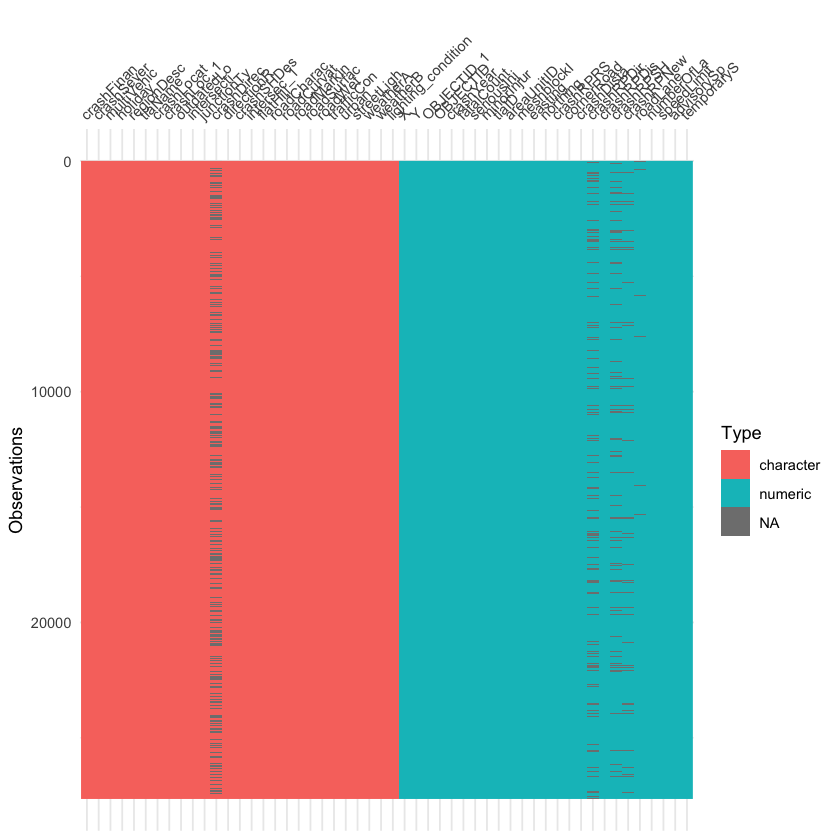

In [65]:
vis_dat(crash_data, warn_large_data = FALSE)